
# Exploratory Data Analysis Notebook

This notebook is going to be comprised of several different sections:

1. Reading and cleaning the data from CSV file
2. Dataframe seperation stuff age height weight
3. Understanding our research group (n=126) population visually, representing their demographics in terms of gender, age, preferred climbing discipline and something else??
4. Something else
5. Something else lol


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction Section

For our data analysis, I wanted to start by trying to understand our research group by representing some basic demographics
To represent this, a series of charts were created, visualizing information such as gender, age, and preferred climbing disciplines.



In [31]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
dataframe = dataframe.dropna(axis=1, how='all')
dataframe = dataframe.dropna(axis=0, how='all')
print(dataframe)
dataframe.isna().sum()


         #     SEX  AGE (YRS)  HEIGHT (CM)  BODY MASS (KG)  YRS CLIMBING  \
0      0.0  Female       38.0        164.0            56.5          10.0   
1      1.0  Female       28.0        157.5            56.1          13.0   
2      2.0  Female       26.0        159.0            51.8           2.0   
3      3.0  Female       26.0        169.0            56.3           8.0   
4      4.0  Female       22.0        173.5            71.8           8.0   
..     ...     ...        ...          ...             ...           ...   
116  193.0    Male       22.0        183.0            84.9           4.0   
117  195.0    Male       42.0        167.5            73.9           5.0   
118  198.0    Male       31.0        174.8            61.9           4.0   
119  200.0  Female       24.0        165.3            56.8           NaN   
120  202.0    Male       30.0        175.0            67.0          11.0   

     CLIMB HRS WEEK  TRAIN HRS WEEK  SPORT GRADE IRCRA  BOULDER GRADE IRCRA  \
0       

#                          0
SEX                        0
AGE (YRS)                  1
HEIGHT (CM)                2
BODY MASS (KG)             0
YRS CLIMBING               7
CLIMB HRS WEEK            10
TRAIN HRS WEEK            16
SPORT GRADE IRCRA         41
BOULDER GRADE IRCRA       49
# REPS                     0
PEAK FORCE (KG)            0
PEAK FORCE % BODY MASS     0
CF (KG)                    0
CF % PEAK FORCE            0
CF % BODY MASS             0
40% MVC (KG)               0
W' (KG)                    0
W' PER KG BODY MASS        0
dtype: int64

## Pie Charts in Pandas for Gender
something many man ooga booga

SEX
Female    56
Male      65
dtype: int64


<AxesSubplot:ylabel='Gender'>

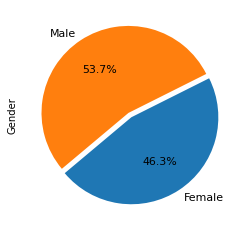

In [11]:
# #gender pie chart

gender_explode = (0.03,0.03)

#removed new dataframe
gender_pie = dataframe.groupby(by='SEX').size()
print(gender_pie)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", explode=gender_explode, startangle = 220)


## Plotting Ages with Pandas 
lot of middle aged climbers in here ooga bunga

<AxesSubplot:>

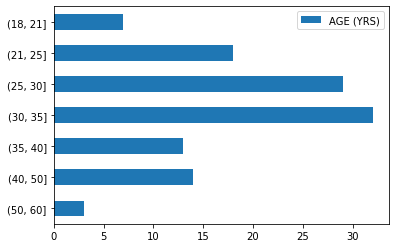

In [39]:

age_bins = [18, 21, 25, 30, 35, 40, 50, 60]

age_bin = (pd.cut(dataframe['AGE (YRS)'],bins=age_bins, ).value_counts().sort_index(ascending=False)).to_frame()
# print(age_bin)
age_bin.plot(kind='barh')

## Seaborn Scatterplot Height (CM) vs Weight (KG)
small cluster of 5'6 130ish pound people (my people!!!!!!!!!!)


<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

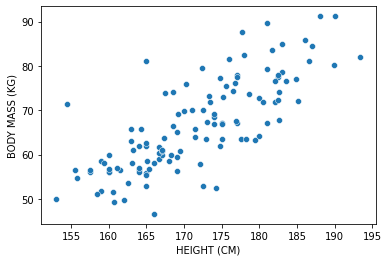

In [27]:
# Using same original dataframe

#Create Seaborn Scatterplot
sns.scatterplot(data = dataframe[['HEIGHT (CM)','BODY MASS (KG)']], x="HEIGHT (CM)", y="BODY MASS (KG)")

## Seaborn Barchart Climbing Discipline Sport vs Bouldering vs Both
Pretty even distribution of sport climbers and boulderers



In [40]:
# TO FIND VALUES FOR BOTH

# dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()

[(0.0, 120.0)]

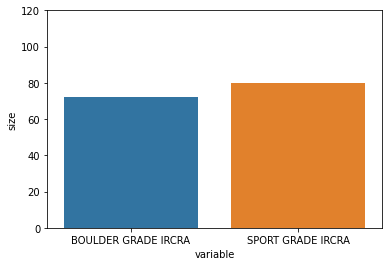

In [15]:
#Changed to original dataframe

#Using pd.melt to extend the pivot, to long format which creates a variable and value column that you can refer to.
#Identifier is the #, aka index and gets overwritten by ylim
disciplines_bar = pd.melt(dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']],id_vars="#").dropna()
disciplines_bar = disciplines_bar.groupby(by='variable',as_index=False).size()

ax3 = sns.barplot(data=disciplines_bar, x="variable", y="size")
ax3.set(ylim=(0,120))
#Set ylim to 120 honestly to make the graph pretty, and have upper limit of people
